In [127]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from seaborn import regplot
plt.style.use('fivethirtyeight')
from sklearn.impute	import	SimpleImputer
from	sklearn.preprocessing	import	StandardScaler,	OneHotEncoder
from	sklearn.model_selection	import	train_test_split
from	sklearn.linear_model	import	LinearRegression
from	sklearn.metrics	import	mean_absolute_error
import	warnings
warnings.filterwarnings("ignore")
import pickle

In [128]:
df=pd.read_csv('data/Bitcoin_Historical_Data.csv')
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-09-17 00:00:00+00:00,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
1,2014-09-18 00:00:00+00:00,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2,2014-09-19 00:00:00+00:00,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
3,2014-09-20 00:00:00+00:00,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
4,2014-09-21 00:00:00+00:00,398.821014,398.821014,412.425995,393.181000,408.084991,26580100


In [129]:
df.shape

(3724, 7)

In [130]:
df.dtypes.value_counts(normalize=True)*100

float64    71.428571
object     14.285714
int64      14.285714
Name: proportion, dtype: float64

In [131]:
#convertir Date d'un objet à un datetime pour une analyse temporelle
df['Date'] = pd.to_datetime(df['Date'])

In [132]:
#création de nouvelle colonnes
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year
#colonne pour calculer l'estimation de l'argent échangé pour chaque ligne.
df['Dollars'] = 0.5 * (df['High']+df['Low']) * df['Volume']

In [133]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,Month,Year,Dollars
0,2014-09-17 00:00:00+00:00,457.334015,457.334015,468.174011,452.421997,465.864014,21056800,9,2014,9.692403e+09
1,2014-09-18 00:00:00+00:00,424.440002,424.440002,456.859985,413.104004,456.859985,34483200,9,2014,1.499957e+10
2,2014-09-19 00:00:00+00:00,394.795990,394.795990,427.834991,384.532013,424.102997,37919700,9,2014,1.540236e+10
3,2014-09-20 00:00:00+00:00,408.903992,408.903992,423.295990,389.882996,394.673004,36863600,9,2014,1.498835e+10
4,2014-09-21 00:00:00+00:00,398.821014,398.821014,412.425995,393.181000,408.084991,26580100,9,2014,1.070656e+10


In [134]:
# les 5 dates avec les valeurs les plus élevées de "Close", triées par ordre décroissant
df.groupby('Date')['Close'].max().sort_values(ascending=False)[:5]

Date
2024-11-22 00:00:00+00:00    98997.664062
2024-11-21 00:00:00+00:00    98504.726562
2024-11-24 00:00:00+00:00    98013.820312
2024-11-23 00:00:00+00:00    97777.281250
2024-11-20 00:00:00+00:00    94339.492188
Name: Close, dtype: float64

In [135]:
#les 5 dates avec les valeurs les plus basses de "Close"
df.groupby('Date')['Close'].min().sort_values().nsmallest(5)


Date
2015-01-14 00:00:00+00:00    178.102997
2015-01-17 00:00:00+00:00    199.259995
2015-01-16 00:00:00+00:00    208.097000
2015-01-15 00:00:00+00:00    209.843994
2015-01-18 00:00:00+00:00    210.339005
Name: Close, dtype: float64

In [136]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume,Month,Year,Dollars
count,3724.000000,3724.000000,3724.000000,3724.000000,3724.000000,3.724000e+03,3724.000000,3724.000000,3.724000e+03
mean,18848.682606,18848.682606,19251.921859,18381.434184,18825.293605,1.814878e+10,6.591837,2019.301557,6.104612e+14
std,20873.547415,20873.547415,21309.793415,20365.354458,20843.083527,1.975859e+10,3.453991,2.954410,1.047990e+15
min,178.102997,178.102997,211.731003,171.509995,176.897003,5.914570e+06,1.000000,2014.000000,2.307853e+09
25%,1198.755005,1198.755005,1217.054962,1178.120026,1192.667511,3.519457e+08,4.000000,2017.000000,3.933484e+11
50%,9284.764160,9284.764160,9440.763184,9134.778809,9284.070801,1.442858e+10,7.000000,2019.000000,1.834315e+14
75%,30182.014648,30182.014648,30605.878418,29580.905762,30153.408691,2.919828e+10,10.000000,2022.000000,7.715237e+14
max,98997.664062,98997.664062,99655.500000,97232.890625,99006.742188,3.509679e+11,12.000000,2024.000000,1.628941e+16


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3724 entries, 0 to 3723
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       3724 non-null   datetime64[ns, UTC]
 1   Adj Close  3724 non-null   float64            
 2   Close      3724 non-null   float64            
 3   High       3724 non-null   float64            
 4   Low        3724 non-null   float64            
 5   Open       3724 non-null   float64            
 6   Volume     3724 non-null   int64              
 7   Month      3724 non-null   int32              
 8   Year       3724 non-null   int32              
 9   Dollars    3724 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int32(2), int64(1)
memory usage: 262.0 KB


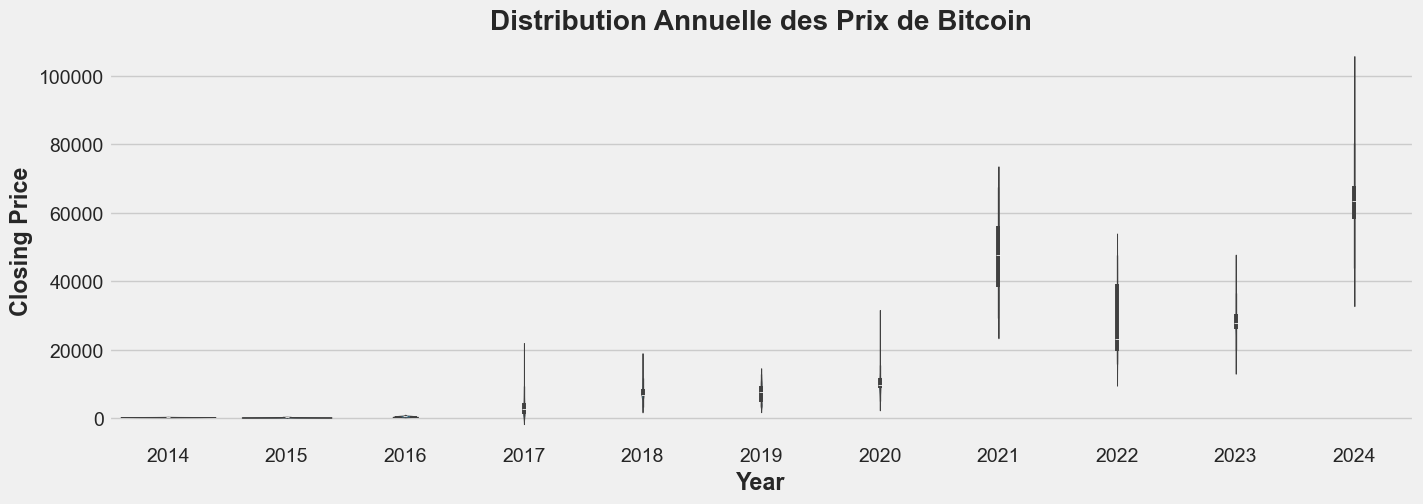

In [138]:
plt.figure(figsize=(15,5))
pl = sns.violinplot(x='Year', y='Close', data=df)
pl.set_title('Distribution Annuelle des Prix de Bitcoin',fontweight='bold')
pl.set_xlabel('Year',fontweight='bold')
pl.set_ylabel('Closing Price',fontweight='bold')
plt.show()

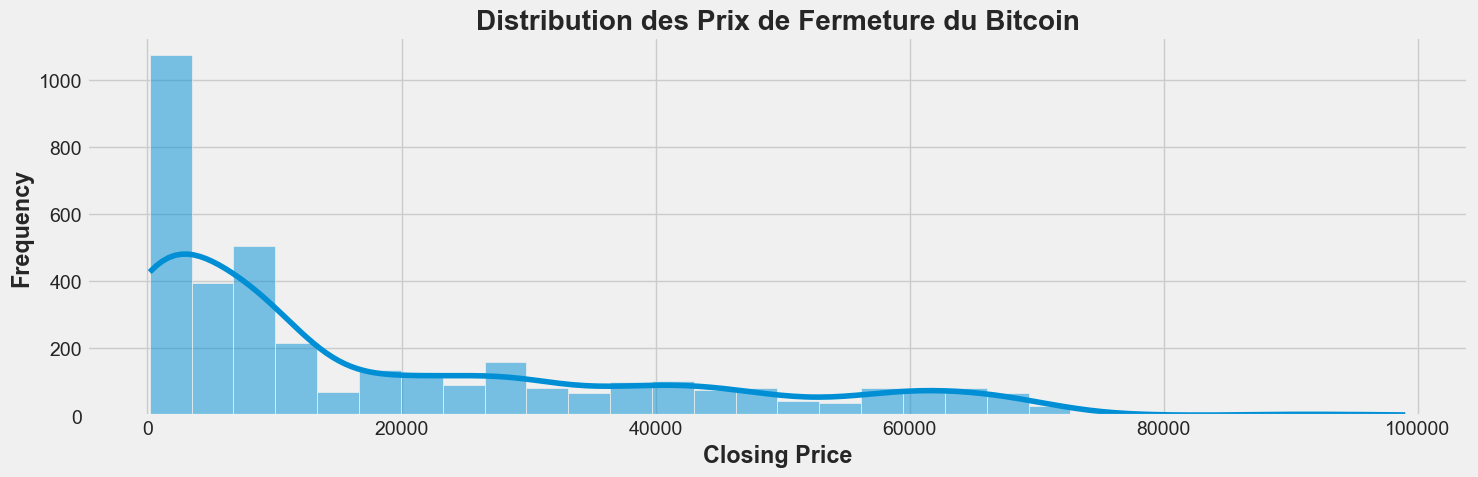

In [139]:
plt.figure(figsize=(15,5))
pl = sns.histplot(df['Close'], bins=30, kde=True)
pl.set_title("Distribution des Prix de Fermeture du Bitcoin",fontweight='bold')
pl.set_xlabel('Closing Price',fontweight='bold')
pl.set_ylabel('Frequency',fontweight='bold')
plt.tight_layout()
plt.show()


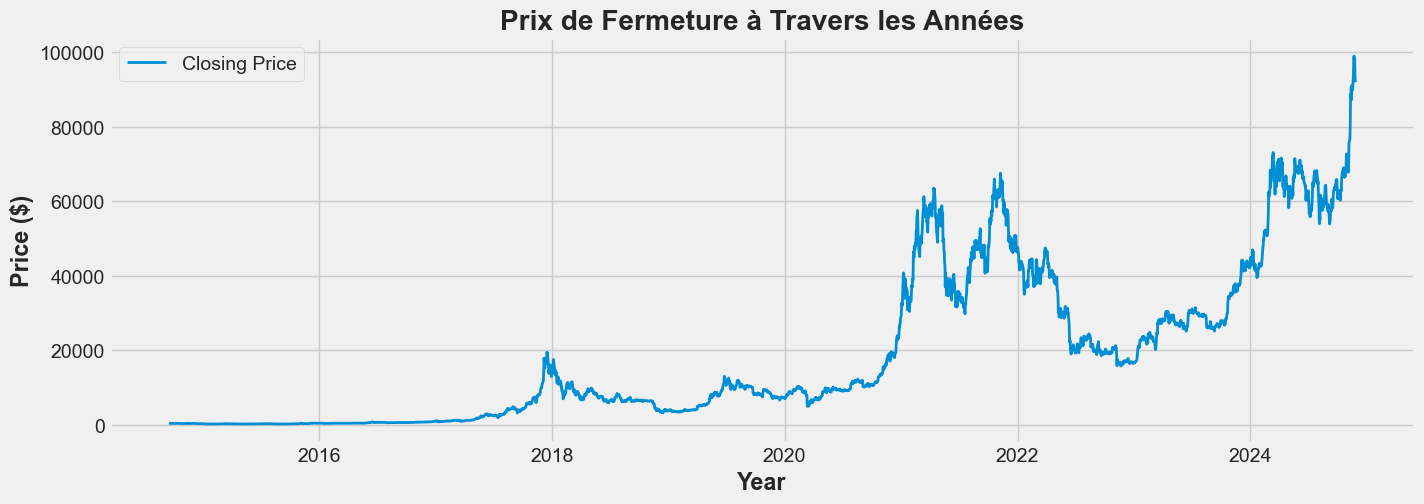

In [140]:
plt.figure(figsize=(15,5))
pl = sns.lineplot(x='Date',y='Close',data=df,lw=2,label='Closing Price')
pl.set_title('Prix de Fermeture à Travers les Années',fontweight='bold')
pl.set_xlabel('Year',fontweight='bold')
pl.set_ylabel('Price ($)',fontweight='bold')
plt.legend()
plt.show()

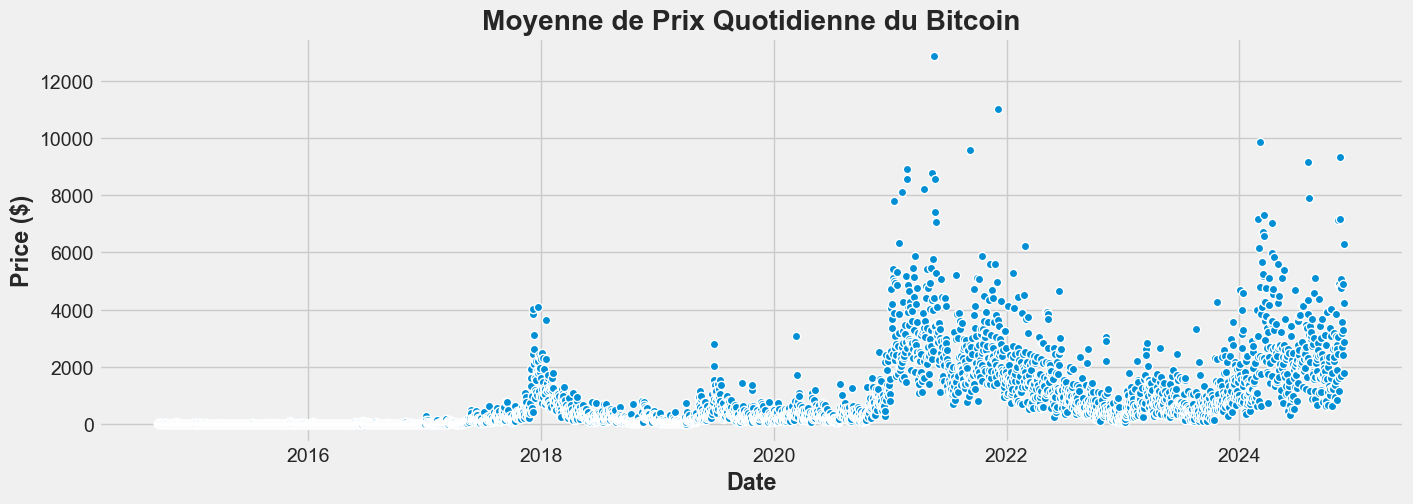

In [141]:
df['Price Range']=df['High']- df['Low']
plt.figure(figsize=(15,5))
pl = sns.scatterplot(x='Date',y=df['Price Range'],data=df,lw=1)
pl.set_title('Moyenne de Prix Quotidienne du Bitcoin',fontweight='bold')
pl.set_xlabel('Date',fontweight='bold')
pl.set_ylabel('Price ($)',fontweight='bold')
plt.show()

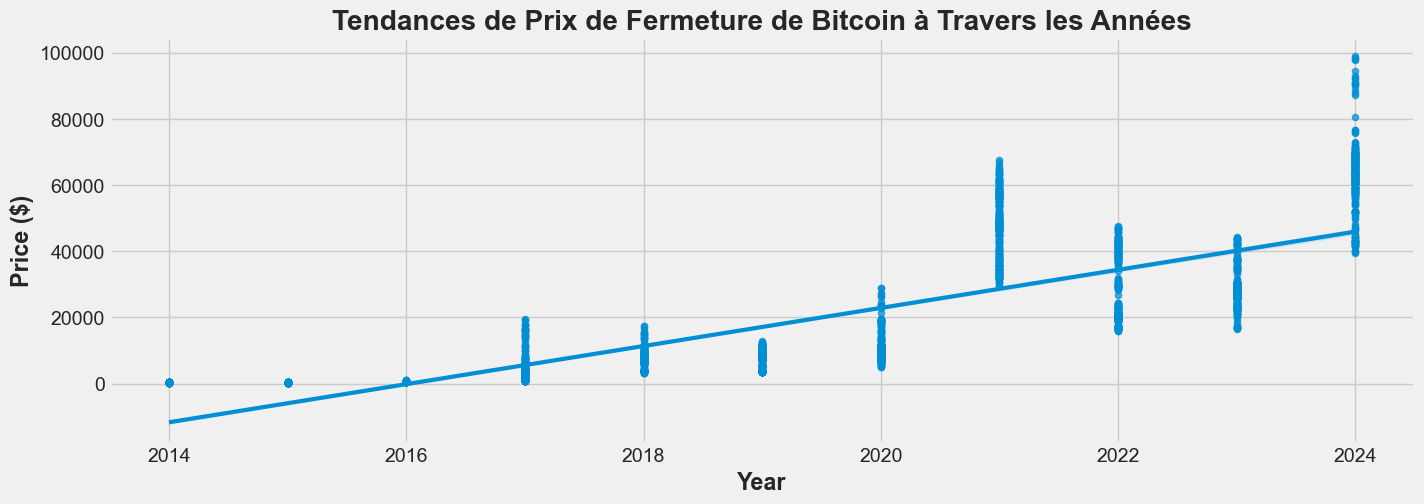

In [142]:
plt.figure(figsize=(15,5))
pl = sns.regplot(data=df, x='Year',y='Close', line_kws={'linewidth':3}, scatter_kws={'s':20,'alpha':0.7})
pl.set_title("Tendances de Prix de Fermeture de Bitcoin à Travers les Années", fontweight='bold')
pl.set_xlabel('Year',fontweight='bold')
pl.set_ylabel('Price ($)',fontweight='bold')
plt.show()

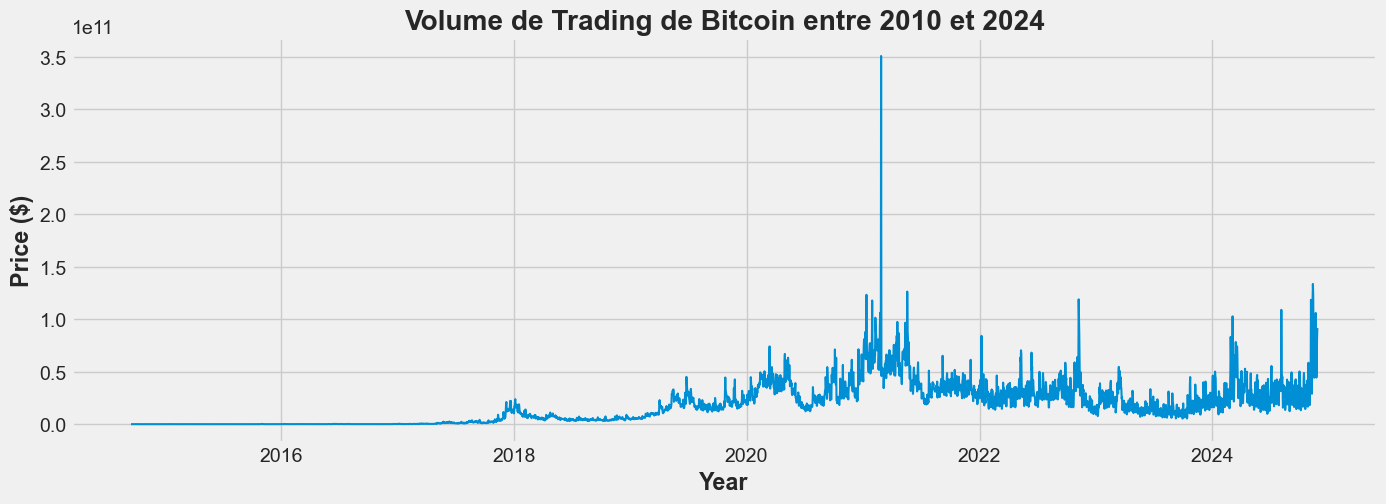

In [143]:
plt.figure(figsize=(15,5))
pl=sns.lineplot(x='Date',y='Volume',data=df,lw=1.5)
pl.set_title("Volume de Trading de Bitcoin entre 2010 et 2024",fontweight='bold')
pl.set_xlabel('Year',fontweight='bold')
pl.set_ylabel('Price ($)',fontweight='bold')
plt.show()

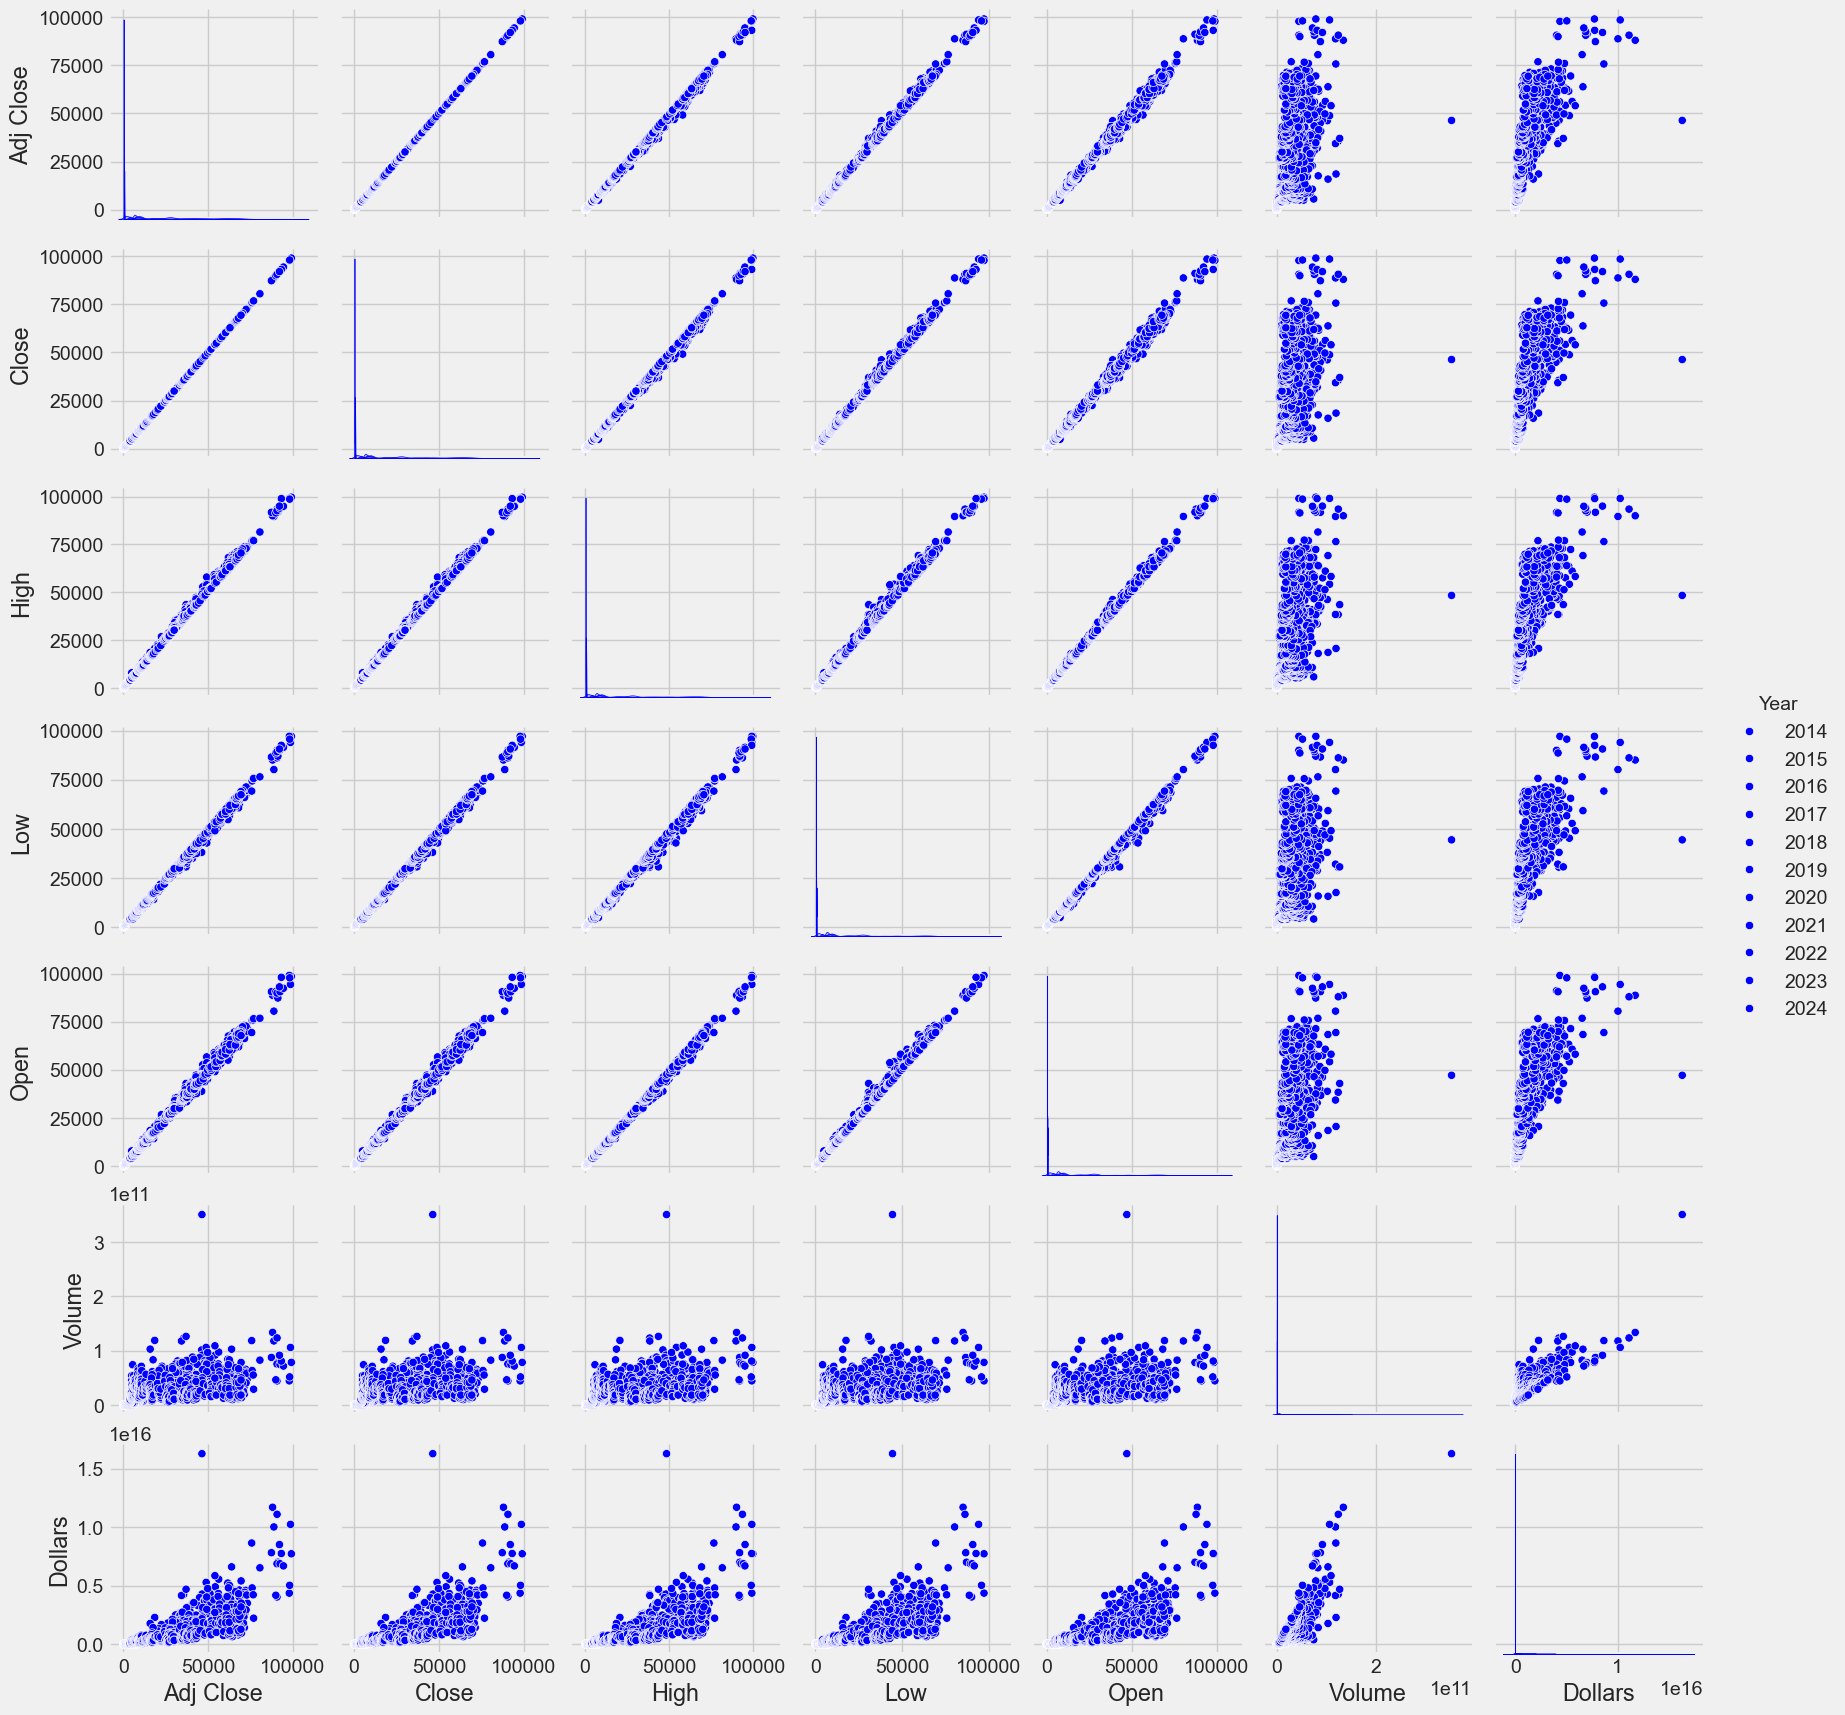

In [144]:
sns.pairplot(df,vars=['Adj Close','Close','High','Low','Open','Volume','Dollars'], palette={year:'blue' for year in df['Year'].unique()},hue='Year')
plt.show()

In [145]:
df_corr=df[['Adj Close','Close','High','Low','Open','Volume']].corr()
df_corr

,Adj Close,Close,High,Low,Open,Volume
Adj Close,1.000000,1.000000,0.999599,0.999486,0.999025,0.654523
Close,1.000000,1.000000,0.999599,0.999486,0.999025,0.654523
High,0.999599,0.999599,1.000000,0.999183,0.999551,0.661160
Low,0.999486,0.999486,0.999183,1.000000,0.999324,0.645355
Open,0.999025,0.999025,0.999551,0.999324,1.000000,0.654951
Volume,0.654523,0.654523,0.661160,0.645355,0.654951,1.000000


In [146]:
df_corr = df.corr()
df_corr.style.background_gradient(cmap='coolwarm')

,Date,Adj Close,Close,High,Low,Open,Volume,Month,Year,Dollars,Price Range
Date,1.000000,0.817026,0.817026,0.815427,0.819309,0.817031,0.632858,0.011847,0.995200,0.558248,0.546227
Adj Close,0.817026,1.000000,1.000000,0.999599,0.999486,0.999025,0.654523,-0.013716,0.815350,0.811738,0.748006
Close,0.817026,1.000000,1.000000,0.999599,0.999486,0.999025,0.654523,-0.013716,0.815350,0.811738,0.748006
High,0.815427,0.999599,0.999599,1.000000,0.999183,0.999551,0.661160,-0.015189,0.813900,0.816993,0.759628
Low,0.819309,0.999486,0.999486,0.999183,1.000000,0.999324,0.645355,-0.011383,0.817393,0.803929,0.732732
Open,0.817031,0.999025,0.999025,0.999551,0.999324,1.000000,0.654951,-0.013925,0.815374,0.811309,0.749802
Volume,0.632858,0.654523,0.654523,0.661160,0.645355,0.654951,1.000000,-0.078937,0.638235,0.833192,0.747950
Month,0.011847,-0.013716,-0.013716,-0.015189,-0.011383,-0.013925,-0.078937,1.000000,-0.085720,-0.048564,-0.072606
Year,0.995200,0.815350,0.815350,0.813900,0.817393,0.815374,0.638235,-0.085720,1.000000,0.560943,0.551330
Dollars,0.558248,0.811738,0.811738,0.816993,0.803929,0.811309,0.833192,-0.048564,0.560943,1.000000,0.820173


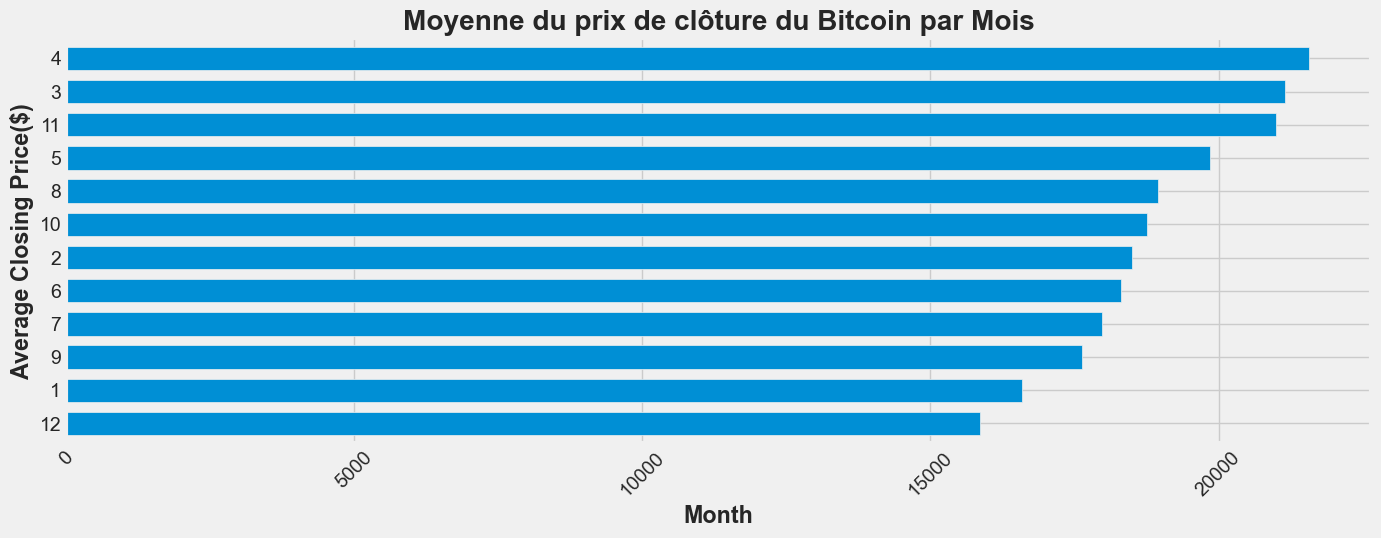

In [147]:
plt.figure(figsize=(15,5))
Monthly_avg = df.groupby('Month')['Close'].mean().sort_values()
pl=Monthly_avg.plot(kind='barh',width=0.7)
pl.set_title('Moyenne du prix de clôture du Bitcoin par Mois',fontweight='bold')
pl.set_xlabel('Month',fontweight='bold')
pl.set_ylabel('Average Closing Price($)',fontweight='bold')
plt.xticks(rotation=45)
plt.show()


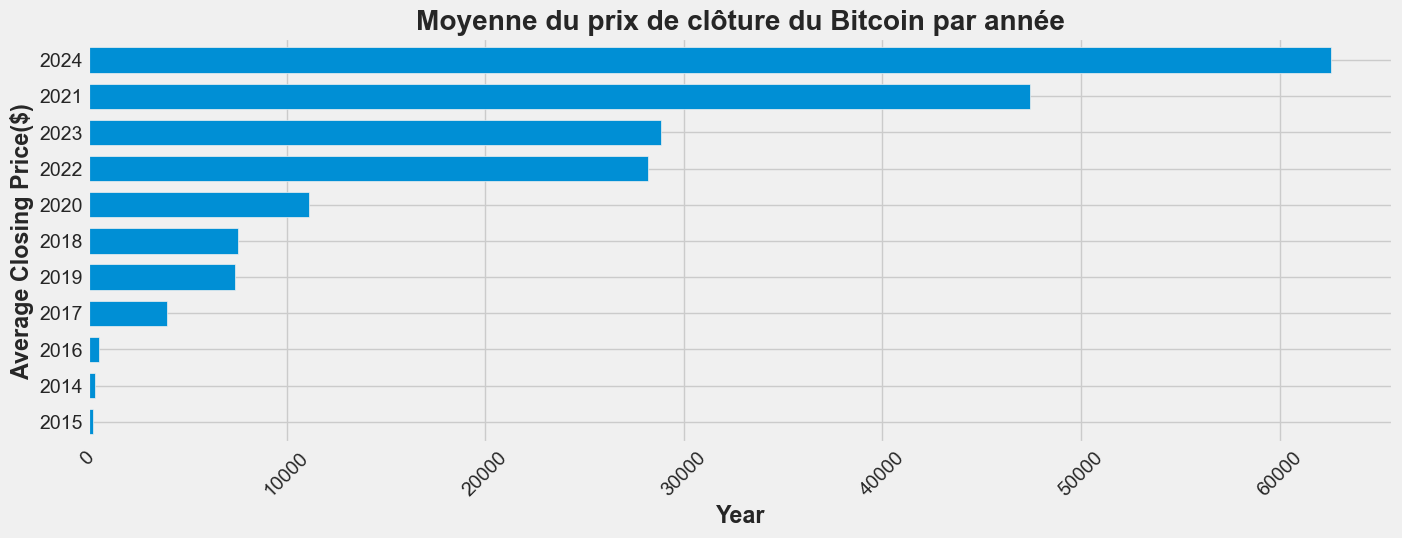

In [148]:
plt.figure(figsize=(15,5))
Yearly_avg = df.groupby('Year')['Close'].mean().sort_values()
pl=Yearly_avg.plot(kind='barh',width=0.7)
pl.set_title('Moyenne du prix de clôture du Bitcoin par année',fontweight='bold')
pl.set_xlabel('Year',fontweight='bold')
pl.set_ylabel('Average Closing Price($)',fontweight='bold')
plt.xticks(rotation=45)
plt.show()

In [149]:
df=df.drop(['Date','Adj Close','Month','Year'],axis=1)

In [150]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

,Close,High,Low,Open,Volume,Dollars,Price Range
0,-0.881202,-0.881579,-0.880487,-0.880959,-0.917584,-0.582576,-0.675674
1,-0.882778,-0.882110,-0.882417,-0.881391,-0.916904,-0.582571,-0.653537
2,-0.884199,-0.883472,-0.883821,-0.882963,-0.916730,-0.582570,-0.653895
3,-0.883523,-0.883685,-0.883558,-0.884375,-0.916784,-0.582571,-0.661713
4,-0.884006,-0.884196,-0.883396,-0.883731,-0.917304,-0.582575,-0.672913


In [151]:
X = df[['High','Low','Open','Volume','Dollars','Price Range']]
y = df['Close']

In [152]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2793, 6)
(2793,)
(931, 6)
(931,)


In [153]:
model = LinearRegression()

In [154]:
model.fit(X_train,y_train)

LinearRegression()

In [155]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print(mae)

0.00813607179578333


In [125]:
model_path = 'models/bitcoin_linear_regression_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(model, f)

print(f"Modèle enregistré avec succès sous '{model_path}'.")

Modèle enregistré avec succès sous 'C://Users/ibtis/PycharmProjects/Bitcoin_price _analysis/models/bitcoin_linear_regression_model.pkl'.
